In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd


SCORES_FOLDER_1_ = "../src/modeling/_1_one_user_learn_neighbours/scores_simpler_2"

### Scatter plot de pos cases en train

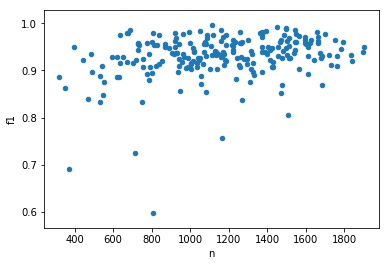

In [2]:
with open(SCORES_FOLDER_1_ + '/f1s_train_None_svc.json', 'r') as f:
    f1s = json.load(f)
with open(SCORES_FOLDER_1_ + '/pos_cases_train_None_svc.json', 'r') as f:
    pcs = pcs_train = json.load(f)
    
rows = [{"f1": f1s[u_id], "n": pcs[u_id]} for u_id in f1s.keys()]
df1 = pd.DataFrame(rows)
df1.plot.scatter("n","f1")

### Scatter plot de pos cases en test

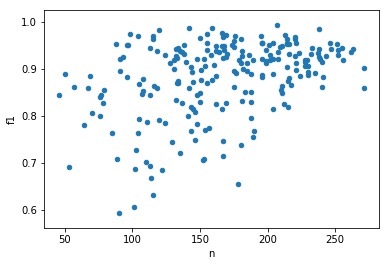

In [3]:
with open(SCORES_FOLDER_1_ + '/f1s_testv_None_svc.json', 'r') as f:
    f1s = json.load(f)
with open(SCORES_FOLDER_1_ + '/pos_cases_testv_None_svc.json', 'r') as f:
    pcs = json.load(f)
    
rows = [{"f1": f1s[u_id], "n": pcs[u_id]} for u_id in f1s.keys()]
df2 = pd.DataFrame(rows)
df2.plot.scatter("n","f1")

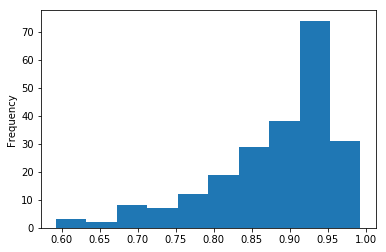

In [4]:
df2.f1.plot.hist()

In [5]:
def torreja(fname):
    with open(SCORES_FOLDER_1_ + fname, 'r') as f:
        d = json.load(f)
    values = [v for v in d.values()]
    values.sort(reverse=True)
    print('Hay {} usuarios procesados de 224'.format(len(values)))
    v = pd.Series(values)
    avg = sum(values) * 1.0 / len(values)
    print('Promedio de valores = {}'.format(avg))
    pos_cases = [pcs_train[u] for u in d.keys()]
#     print(pos_cases)
    print('Promedio de casos positivos en test= {}'.format(sum(pos_cases) * 1.0 / len(pos_cases) ))
    plt.plot(v)

### Todos los usuarios de prueba sin filtrar por tiempo

Hay 223 datos procesados de 224
Promedio de valores = 0.8805341861056077
Promedio de casos positivos en test= 1161.457399103139


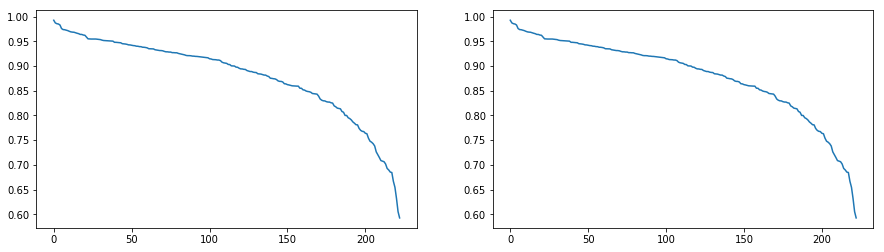

In [6]:
with open(SCORES_FOLDER_1_ + '/f1s_testv_None_svc.json', 'r') as f:
    d = json.load(f)
values_test = [v for v in d.values()]
values_test.sort(reverse=True)
print('Hay {} datos procesados de 224'.format(len(values_test)))
v_test = pd.Series(values_test)
avg = sum(values_test) * 1.0 / len(values_test)
print('Promedio de valores = {}'.format(avg))
pos_cases = [pcs_train[u] for u in d.keys()]
#     print(pos_cases)
print('Promedio de casos positivos en test= {}'.format(sum(pos_cases) * 1.0 / len(pos_cases) ))
fig, axes = plt.subplots(ncols=2)
v_test.plot(ax=axes[0], figsize=(15, 4))
v_test.plot(ax=axes[1], figsize=(15, 4))
# plt.plot(v)

In [7]:
def get_values(filename):
    with open(filename) as f:
        d = json.load(f)
    values = [v for v in d.values()]
    values.sort(reverse=True)
    print('Hay {} datos procesados de 224'.format(len(values)))
    return values

def print_averages(values, label):
    avg = sum(values) * 1.0 / len(values)
    print('\tF1s F1s F1s F1s F1s F1s F1s ')
    print('Promedio de valores {} = {}'.format(label, avg))
    print('Valor mínimo en {label}: {}\tValor máximo en {label}: {}'.format(min(values), max(values), label=label))

def print_pos_cases(values, label):
    avg = sum(values) * 1.0 / len(values)
    print('\tPOS_CASES POS_CASES POS_CASES POS_CASES POS_CASES ')
    print('Promedio de valores {} = {}. Cantidad de valores: {}'.format(label, avg, len(values)))
    print('Valor mínimo en {label}: {}\tValor máximo en {label}: {}'.format(min(values), max(values), label=label))
    
def process_f1s(mins):
    mins = 'None' if mins == 0 else str(mins)
    filename_test = SCORES_FOLDER_1_ + '/f1s_testv_{}_svc.json'.format(mins)
    filename_train = SCORES_FOLDER_1_ + '/f1s_train_{}_svc.json'.format(mins)
    filename_pc_test = SCORES_FOLDER_1_ + '/pos_cases_testv_{}_svc.json'.format(mins)
    filename_pc_train = SCORES_FOLDER_1_ + '/pos_cases_train_{}_svc.json'.format(mins)
    test_v = pd.Series(get_values(filename_test))
    train_v = pd.Series(get_values(filename_train))
    pc_train_v = pd.Series(get_values(filename_pc_train))
    pc_test_v = pd.Series(get_values(filename_pc_test))
    print_averages(train_v, 'TRAIN')
    print_averages(test_v, 'TEST')
    print_pos_cases(pc_test_v, 'TEST')
    print_pos_cases(pc_train_v, 'TRAIN')
    # plot
    #fig, axes = plt.subplots(ncols=2, sharey=True)
    # HISTOGRAMA AL LADO? (con bins. como mas arriba)
    ax = test_v.plot(label='Test', legend=True)
    ax = train_v.plot(figsize=(15, 7), label='Train', legend=True)
    ax.set_title('F1 scores for {} window (mins)'.format(mins))
    ax.set_ylabel('F1')
    ax.set_xlabel('Usuarios (ordenados) por f1')

"""
TODO:
- histogramas de frecuencia
- promedio de pos_cases (cantidad de datos es importante!)
- ver por que los scores aumentan
- ver que onda el que fallo: '824157'
"""

"\nTODO:\n- histogramas de frecuencia\n- promedio de pos_cases (cantidad de datos es importante!)\n- ver por que los scores aumentan\n- ver que onda el que fallo: '824157'\n"

Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TRAIN = 0.9297389022430198
Valor mínimo en TRAIN: 0.5973425765453495	Valor máximo en TRAIN: 0.9963996399639965
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TEST = 0.8805341861056077
Valor mínimo en TEST: 0.5925925925925926	Valor máximo en TEST: 0.9927007299270074
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TEST = 165.89237668161434. Cantidad de valores: 223
Valor mínimo en TEST: 46	Valor máximo en TEST: 271
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TRAIN = 1161.457399103139. Cantidad de valores: 223
Valor mínimo en TRAIN: 321	Valor máximo en TRAIN: 1901


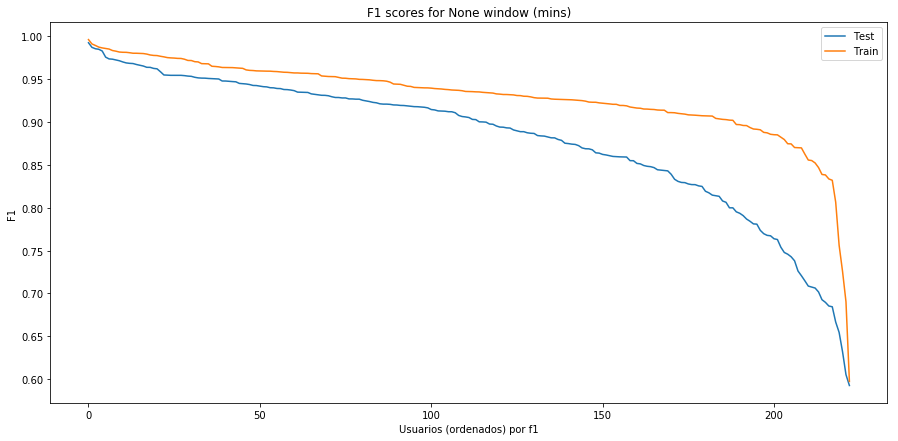

In [8]:
process_f1s(0) # todo el dataset 

Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TRAIN = 0.9495655693983199
Valor mínimo en TRAIN: 0.3627370156636438	Valor máximo en TRAIN: 1.0
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TEST = 0.942382734375534
Valor mínimo en TEST: 0.36273701566364386	Valor máximo en TEST: 1.0
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TEST = 140.97757847533632. Cantidad de valores: 223
Valor mínimo en TEST: 19	Valor máximo en TEST: 257
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TRAIN = 987.0986547085201. Cantidad de valores: 223
Valor mínimo en TRAIN: 134	Valor máximo en TRAIN: 1801


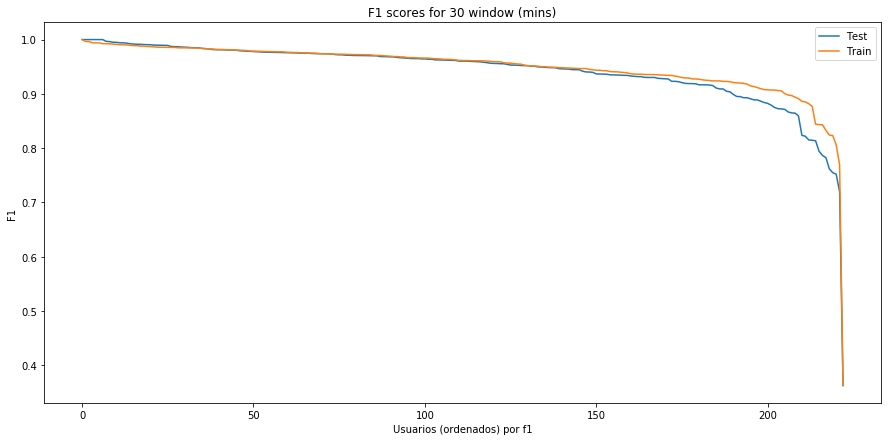

In [9]:
process_f1s(30)

Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TRAIN = 0.943752845056405
Valor mínimo en TRAIN: 0.7750865051903115	Valor máximo en TRAIN: 0.9995376791493296
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TEST = 0.9338916269461915
Valor mínimo en TEST: 0.4782608695652174	Valor máximo en TEST: 1.0
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TEST = 144.5695067264574. Cantidad de valores: 223
Valor mínimo en TEST: 23	Valor máximo en TEST: 260
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TRAIN = 1012.4170403587444. Cantidad de valores: 223
Valor mínimo en TRAIN: 162	Valor máximo en TRAIN: 1824


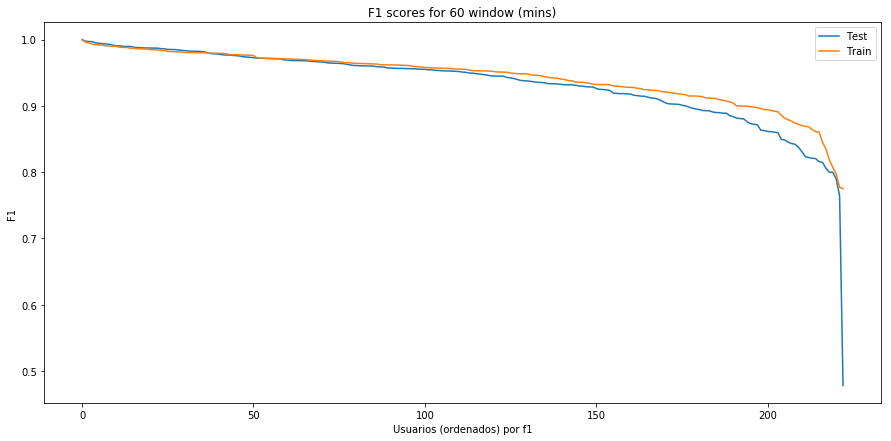

In [10]:
process_f1s(60)

Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TRAIN = 0.9381948935388564
Valor mínimo en TRAIN: 0.7131537242472267	Valor máximo en TRAIN: 0.9981515711645101
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TEST = 0.9175414662660055
Valor mínimo en TEST: 0.46875	Valor máximo en TEST: 1.0
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TEST = 148.76233183856502. Cantidad de valores: 223
Valor mínimo en TEST: 29	Valor máximo en TEST: 263
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TRAIN = 1041.6502242152467. Cantidad de valores: 223
Valor mínimo en TRAIN: 205	Valor máximo en TRAIN: 1841


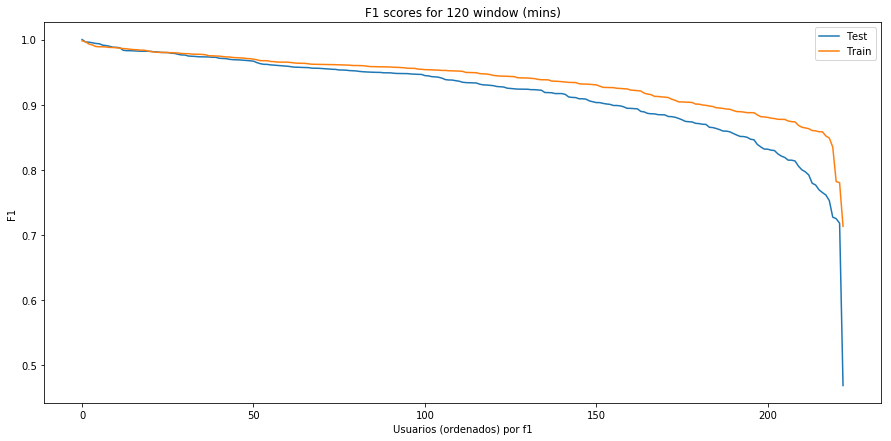

In [11]:
process_f1s(120)

Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
Hay 223 datos procesados de 224
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TRAIN = 0.9357756379560607
Valor mínimo en TRAIN: 0.7475035663338088	Valor máximo en TRAIN: 0.9967697277341948
	F1s F1s F1s F1s F1s F1s F1s 
Promedio de valores TEST = 0.9043286878896691
Valor mínimo en TEST: 0.38202247191011235	Valor máximo en TEST: 0.9975550122249389
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TEST = 153.18834080717488. Cantidad de valores: 223
Valor mínimo en TEST: 35	Valor máximo en TEST: 265
	POS_CASES POS_CASES POS_CASES POS_CASES POS_CASES 
Promedio de valores TRAIN = 1072.8565022421524. Cantidad de valores: 223
Valor mínimo en TRAIN: 248	Valor máximo en TRAIN: 1856


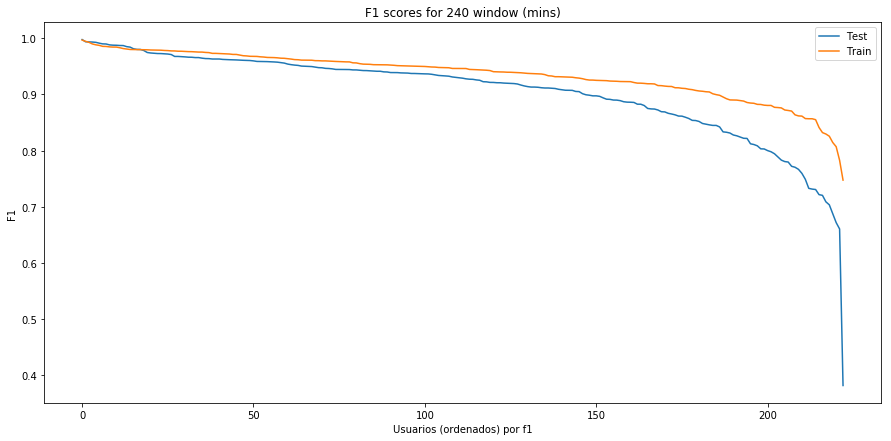

In [12]:
process_f1s(240)

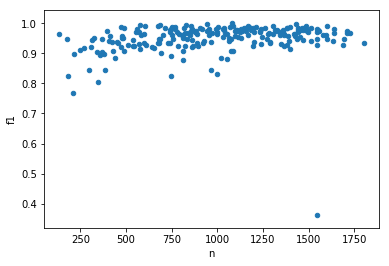

In [15]:
with open(SCORES_FOLDER_1_ + '/f1s_train_30_svc.json', 'r') as f:
    f1s = json.load(f)
with open(SCORES_FOLDER_1_ + '/pos_cases_train_30_svc.json', 'r') as f:
    pcs = pcs_train = json.load(f)
    
rows = [{"f1": f1s[u_id], "n": pcs[u_id]} for u_id in f1s.keys()]
df1 = pd.DataFrame(rows)
df1.plot.scatter("n","f1")

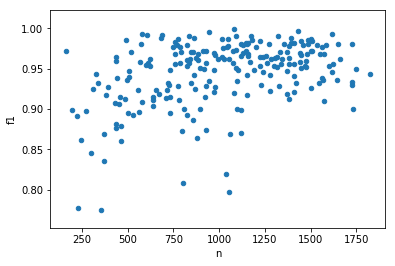

In [16]:
with open(SCORES_FOLDER_1_ + '/f1s_train_60_svc.json', 'r') as f:
    f1s = json.load(f)
with open(SCORES_FOLDER_1_ + '/pos_cases_train_60_svc.json', 'r') as f:
    pcs = pcs_train = json.load(f)
    
rows = [{"f1": f1s[u_id], "n": pcs[u_id]} for u_id in f1s.keys()]
df1 = pd.DataFrame(rows)
df1.plot.scatter("n","f1")

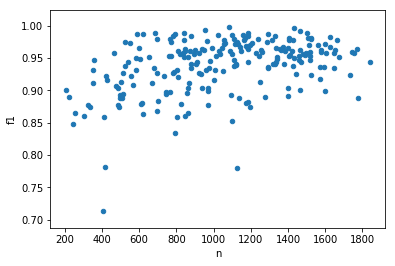

In [17]:
with open(SCORES_FOLDER_1_ + '/f1s_train_120_svc.json', 'r') as f:
    f1s = json.load(f)
with open(SCORES_FOLDER_1_ + '/pos_cases_train_120_svc.json', 'r') as f:
    pcs = pcs_train = json.load(f)
    
rows = [{"f1": f1s[u_id], "n": pcs[u_id]} for u_id in f1s.keys()]
df1 = pd.DataFrame(rows)
df1.plot.scatter("n","f1")

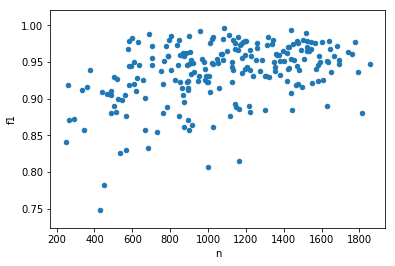

In [18]:
with open(SCORES_FOLDER_1_ + '/f1s_train_240_svc.json', 'r') as f:
    f1s = json.load(f)
with open(SCORES_FOLDER_1_ + '/pos_cases_train_240_svc.json', 'r') as f:
    pcs = pcs_train = json.load(f)
    
rows = [{"f1": f1s[u_id], "n": pcs[u_id]} for u_id in f1s.keys()]
df1 = pd.DataFrame(rows)
df1.plot.scatter("n","f1")

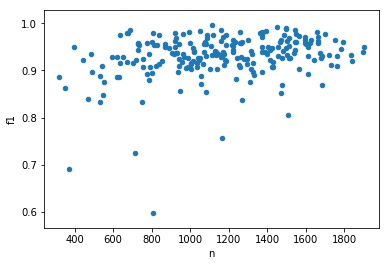

In [19]:
with open(SCORES_FOLDER_1_ + '/f1s_train_None_svc.json', 'r') as f:
    f1s = json.load(f)
with open(SCORES_FOLDER_1_ + '/pos_cases_train_None_svc.json', 'r') as f:
    pcs = pcs_train = json.load(f)
    
rows = [{"f1": f1s[u_id], "n": pcs[u_id]} for u_id in f1s.keys()]
df1 = pd.DataFrame(rows)
df1.plot.scatter("n","f1")